In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/ITI_GP_Twenty Too"
! ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ITI_GP_Twenty Too


In [ ]:
! pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
import joblib
import pandas as pd
import numpy as np
import emoji
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [ ]:
class Demojizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [emoji.demojize(text) for text in X]

In [ ]:
loaded_pipeline = joblib.load('SA.pkl')

Enter your text: ❤️‍🔥
{'negative': 0.019868026144332692, 'neutral': 0.2124079616575075, 'positive': 0.7677240121981598}
Final Prediction: positive


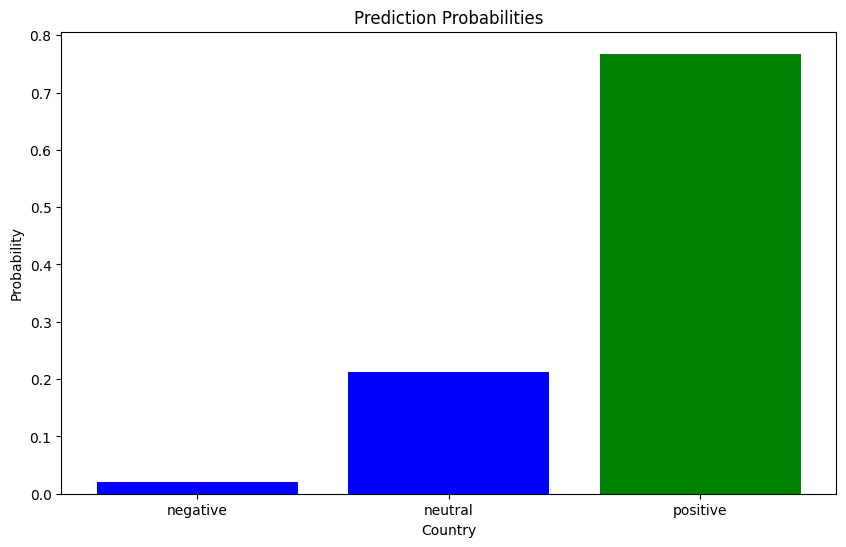

In [ ]:
text = input("Enter your text: ")
text_series = pd.Series([text])
probabilities = loaded_pipeline.predict_proba(text_series)

# Get the actual target labels from the loaded pipeline
target_labels = loaded_pipeline.classes_

# Adjust the mapping to match the actual labels
target_names = ['negative', 'neutral', 'positive']  # Keep the desired display names
label_name_mapping = dict(zip(target_labels, target_names))

class_labels = loaded_pipeline.classes_

# Now this should work without KeyError
prob_dict = {label_name_mapping[label]: prob for label, prob in zip(class_labels, probabilities[0])}

final_prediction_label = loaded_pipeline.predict(text_series)[0]
final_prediction_name = label_name_mapping[final_prediction_label]

print(prob_dict)
print(f"Final Prediction: {final_prediction_name}")

# Plot the probabilities
labels = list(prob_dict.keys())
probs = list(prob_dict.values())

colors = ['blue' if label != final_prediction_name else 'green' for label in labels]

plt.figure(figsize=(10, 6))
plt.bar(labels, probs, color=colors)
plt.xlabel('Country')
plt.ylabel('Probability')
plt.title('Prediction Probabilities')
plt.show()